# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling
The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False

Do not fit any preprocessing algorithm (PCA, StandardScaler...) on the whole dataset, but only on the training set, and use the fitted algorithm to transform the test set.

When you fit the standard scaler on the whole dataset, information from the test set is used to normalize the training set. This is a common case of "data leakage", which means that information from the test set is used while training the model. This often results in overestimates of the model's performance.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#fit() : Compute the mean and std to be used for later scaling.
#fit_transform()Fit to data, then transform it.
X_train = sc.fit_transform(X_train)
 # no fit_transform(X_test) on the test data.The fit already occurred
X_test = sc.transform(X_test) # avoid data leakage

In [ ]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

## Training the K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicting the Test set results

In [ ]:
y_pred = knn.predict(X_test)

## Making the Confusion Matrix to compare both models

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

In [ ]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")
print("Cross validation Accuracy:", acc.mean())

Cross validation Accuracy: 0.8833333333333333


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[170,  19],
       [ 16,  95]])

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

precision_score(y_train, y_train_pred)

0.8333333333333334

In [ ]:
recall_score(y_train, y_train_pred)

0.8558558558558559

In [ ]:
f1_score(y_train, y_train_pred)

0.8444444444444444

## Visualising the effect of K

In [ ]:
error_rate = [] #list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

[0.13,
 0.1,
 0.07,
 0.08,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07]

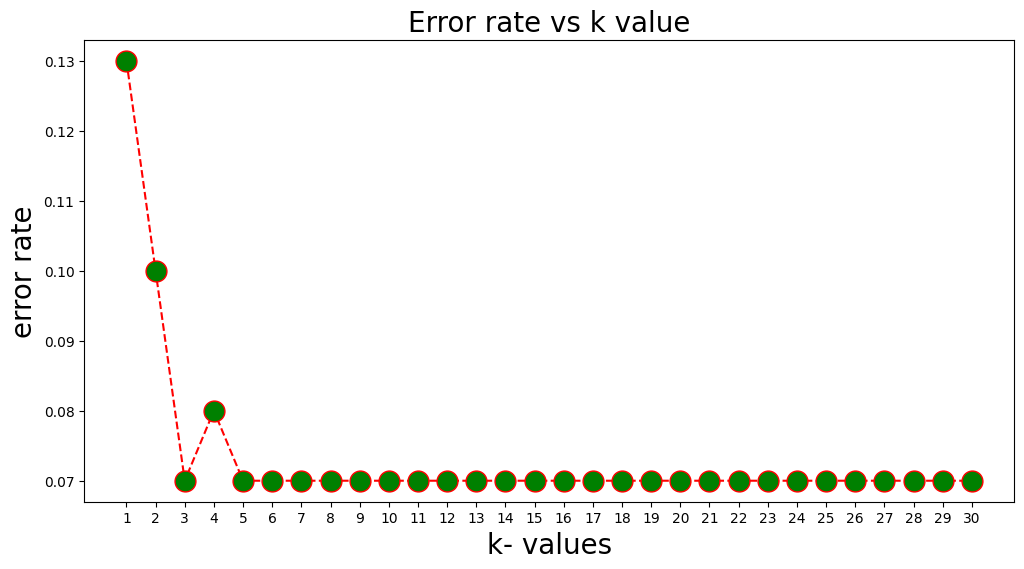

In [ ]:
#plotting the error rate vs k graph
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()
